# Introduction to SIG bases 

## 1. Introduction to Geometries

In Geographic Information Systems (GIS), geometries are fundamental elements used to represent spatial features such as points, lines, and polygons. 

Geometries provide the building blocks for spatial analysis, visualization, and modeling within GIS software and libraries.


### 1. Points
A point is the simplest geometry and represents a single location in space defined by its coordinates, typically latitude and longitude on a spherical or ellipsoidal model of the Earth. In GIS, points are commonly used to represent features like landmarks, cities, or sampling locations.

Let's create a simple point using Python and the Shapely library:

In [ ]:
# import Point from the shapely library
from shapely.geometry import Point

# Define coordinates for the point (longitude, latitude)
longitude = -122.4194
latitude = 37.7749

# Create a Point object
point = Point(longitude, latitude)

Now, let's visualize the point using matplotlib:

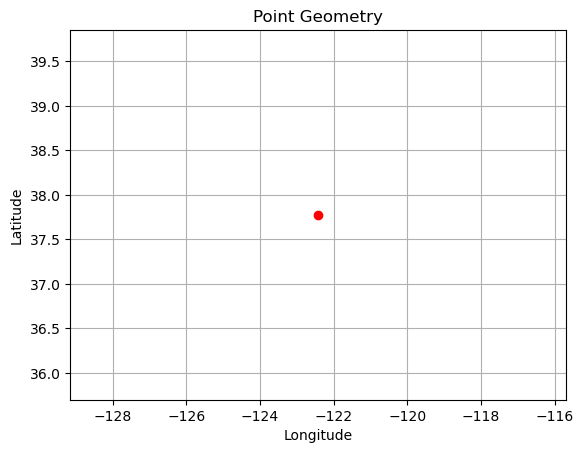

In [ ]:
import matplotlib.pyplot as plt

# Extract coordinates from the point
x, y = point.x, point.y

# Plot the point
plt.plot(x, y, "ro")  # 'ro' specifies red color and 'o' marker
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Point Geometry")
plt.grid(True)
plt.show()

### 2. Lines 
A line is a sequence of connected points that define a path in space. In GIS, lines are commonly used to represent features like roads, rivers, or political boundaries.

Let's create a simple line using Shapely library:

In [ ]:
# import LineString from the shapely library
from shapely.geometry import LineString


# Define coordinates for the line (sequence of points)
line_coords = [
    (-122.4194, 37.7749),
    (-122.4086, 37.8199),
    (-122.4086, 38.8199),
    (-122.3917, 37.7394),
]

# Create a LineString object
line = LineString(line_coords)

Visualizing the line:

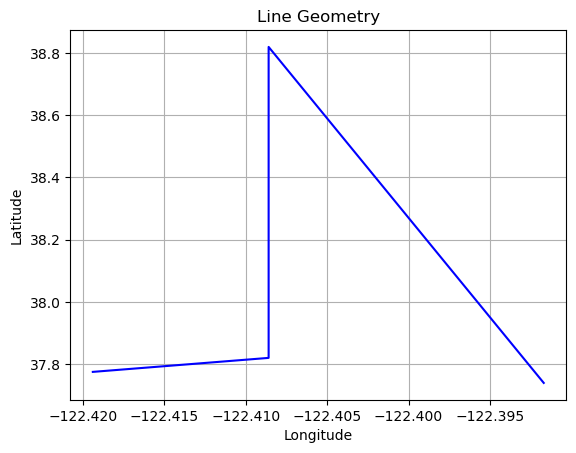

In [ ]:
# Extract coordinates from the line
x, y = line.xy

# Plot the line
plt.plot(x, y, "b-")  # 'b-' specifies blue color and solid line
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Line Geometry")
plt.grid(True)
plt.show()

### 3. Polygons

A polygon is a closed sequence of connected points, where the last point is the same as the first point, defining a bounded area in space. In GIS, polygons are commonly used to represent features like countries, lakes, or administrative boundaries.

Let's create a simple polygon using Shapely:

In [ ]:
# import Polygon from the shapely library
from shapely.geometry import Polygon

# Define coordinates for the polygon (sequence of points)
polygon_coords = [
    (-122.4194, 37.7749),
    (-122.4086, 37.8199),
    (-122.3917, 37.7394),
    (-122.4194, 37.7749),
]

# Create a Polygon object
polygon = Polygon(polygon_coords)

Visualizing the polygon:

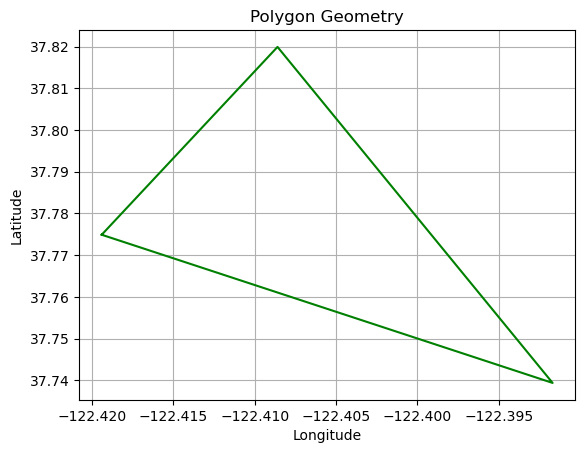

In [ ]:
# Extract coordinates from the polygon
x, y = polygon.exterior.xy

# Plot the polygon
plt.plot(x, y, "g-")  # 'g-' specifies green color and solid line
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Polygon Geometry")
plt.grid(True)
plt.show()

### Geometry Exercise
In this exercise, you will create different types of geometries (points, lines, polygons) and visualize them using the Shapely library.

- Create a point geometry at coordinates (-122.4194, 37.7749) representing the location of San Francisco.
- Create a line geometry connecting the following coordinates: (-122.4194, 37.7749), (-122.4086, 37.8199), (-122.3917, 37.7394).
- Create a polygon geometry representing a square with corners at coordinates: (-122.4194, 37.7749), (-122.4086, 37.7749), (-122.4086, 37.8199), (-122.4194, 37.8199).
- Visualize each geometry using matplotlib.

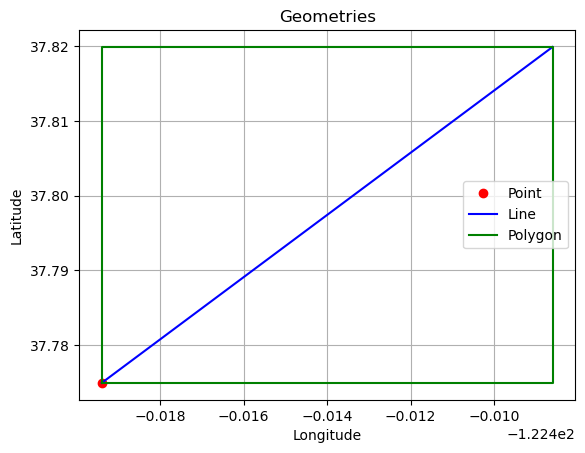

In [ ]:
# Import necessary libraries
from shapely.geometry import Point, LineString, Polygon
import matplotlib.pyplot as plt

# Create point geometry
point = Point(-122.4194, 37.7749)

# Create line geometry
line = LineString([(-122.4194, 37.7749), (-122.4086, 37.8199)])

# Create polygon geometry
polygon = Polygon(
    [
        (-122.4194, 37.7749),
        (-122.4086, 37.7749),
        (-122.4086, 37.8199),
        (-122.4194, 37.8199),
    ]
)

# Visualize geometries
fig, ax = plt.subplots()
ax.plot(*point.xy, "ro", label="Point")
ax.plot(*line.xy, "b-", label="Line")
ax.plot(*polygon.exterior.xy, "g-", label="Polygon")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Geometries")
ax.grid(True)
ax.legend()
plt.show()

### 4. Operations 

 1. Unary: Functions that only applies to one geometry. 
    For instance: 
    -  is_valid: Returns True if the geometry is valid.
    -  is_closed: Returns True if a linestring's first and last points are equal.

In [ ]:
# is_valid :
from shapely import is_valid, GeometryCollection, LineString, Polygon

print("is_valid examples:")
print("Is LineString : (0,0), (1,1) valid? :", is_valid(LineString([(0, 0), (1, 1)])))
print(
    "Is Polygon : (0, 0), (1, 1), (1, 2), (1, 1), (0, 0) valid? :",
    is_valid(Polygon([(0, 0), (1, 1), (1, 2), (1, 1), (0, 0)])),
)
print("Is None valid? :", is_valid(None))

is_valid examples:
Is LineString : (0,0), (1,1) valid? : True
Is Polygon : (0, 0), (1, 1), (1, 2), (1, 1), (0, 0) valid? : False
Is None valid? : False


In [ ]:
from shapely import is_closed

print("is_closed examples")
print("Is LineString : (0,0), (1,1) closed? :", is_closed(LineString([(0, 0), (1, 1)])))
print(
    "Is LineString : (0, 0), (0, 1), (1, 1), (0, 0) : ",
    is_closed(LineString([(0, 0), (0, 1), (1, 1), (0, 0)])),
)

is_closed examples
Is LineString : (0,0), (1,1) closed? : False
Is LineString : (0, 0), (0, 1), (1, 1), (0, 0) :  True


 2. Binary: Functions that are aapplied to two geometries
   For instances : 
    - contains : Returns True if geometry B is completely inside geometry A.
    - equals : Returns True if A and B are spatially equal.

In [ ]:
# Contains function
from shapely import contains, LineString, Point, Polygon

print("1. Does the line (0,0, (1,1)) contains this points?")
line = LineString([(0, 0), (1, 1)])
print("Point 1: (0, 0)? : ", contains(line, Point(0, 0)))
print("Point2 : (0.5, 0.5)? : ", contains(line, Point(0.5, 0.5)))

print(
    "2. Does the area ([(0, 0), (1, 0), (1, 1), (0, 1), (0, 0)]), containt this geometries?"
)
area = Polygon([(0, 0), (1, 0), (1, 1), (0, 1), (0, 0)])
print("Point1: (0,0)? : ", contains(area, Point(0, 0)))
print("Line: (0,0, (1,1)? : ", contains(area, line))


print("3. Does this polygon with a hole contains this geometries?")
polygon_with_hole = Polygon(
    [(0, 0), (0, 10), (10, 10), (10, 0), (0, 0)],
    holes=[[(2, 2), (2, 4), (4, 4), (4, 2), (2, 2)]],
)
print("Point 1: (0,0)? : ", contains(polygon_with_hole, Point(1, 1)))
print(
    "Line : (1, 1), (5, 5)? :  ",
    contains(polygon_with_hole, LineString([(1, 1), (5, 5)])),
)
print("Area (0, 0), (1, 0), (1, 1), (0, 1), (0, 0)? : ", contains(area, area))

1. Does the line (0,0, (1,1)) contains this points?
Point 1: (0, 0)? :  False
Point2 : (0.5, 0.5)? :  True
2. Does the area ([(0, 0), (1, 0), (1, 1), (0, 1), (0, 0)]), containt this geometries?
Point1: (0,0)? :  False
Line: (0,0, (1,1)? :  True
3. Does this polygon with a hole contains this geometries?
Point 1: (0,0)? :  True
Line : (1, 1), (5, 5)? :   False
Area (0, 0), (1, 0), (1, 1), (0, 1), (0, 0)? :  True


In [ ]:
# Equals function
from shapely import equals, GeometryCollection, LineString, Polygon

line = LineString([(0, 0), (5, 5), (10, 10)])
print(
    "Does the line1 ((0, 0), (5, 5), (10, 10)), equals the line2 ((0, 0), (10, 10))? : ",
    equals(line, LineString([(0, 0), (10, 10)])),
)

Does the line1 ((0, 0), (5, 5), (10, 10)), equals the line2 ((0, 0), (10, 10))? :  True


For more information, please refer to the [shapely documentation](https://shapely.readthedocs.io/en/stable/predicates.html).

## 2. Projections (Coordinate Reference Systems - CRS)

Coordinate Reference Systems (CRS) are fundamental in GIS as they define how geographic data is represented on a two-dimensional surface, such as a map. 


### 1. What is a CRS?

A CRS, or Coordinate Reference System, is a system that uses coordinates to uniquely identify locations on the Earth's surface.
It consists of a datum, which defines the shape and size of the Earth, and a projection, which transforms the Earth's three-dimensional surface onto a two-dimensional plane.

### 2. Types of CRS: 

 - Geographic CRS: Uses latitude and longitude coordinates to specify locations on the Earth's surface
 - Projected CRS: Uses Cartesian coordinates (e.g., x, y) to represent locations on a flat surface. 

### 3. Map Projections 

Map projections are mathematical transformations used to represent the Earth's surface on a two-dimensional map. Due to the Earth's spherical shape, it's impossible to create a perfect flat map without distortion. Different map projections prioritize different characteristics (e.g., area, shape, distance, direction), resulting in different types of distortion.


Common map projections include:

- [Mercator Projection](https://en.wikipedia.org/wiki/Web_Mercator_projection): Preserves direction and shape but distorts area, particularly near the poles
![Mercator Projection](../images/Mercator_projection.jpeg)

- [Lambert Conformal Conic Projection](https://en.wikipedia.org/wiki/Lambert_conformal_conic_projection): Preserves shape and area but distorts distance and direction.
![Lambert Conformal Conic Projection](../images/Lambert_conformal.jpeg)

- [Albers Equal Area Conic Projection](https://en.wikipedia.org/wiki/Albers_projection): Preserves area but distorts shape, distance, and direction.
![Albers Projection](../images/Albers_projection.jpeg)

### Projection Demo



In [ ]:
# Import necessary packages
import geopandas as gpd

# Read the file
data_filepath = "../data/DES_data.gpkg"
data = gpd.read_file(data_filepath)

# Check the coordinate reference system
data.crs

<Projected CRS: EPSG:32737>
Name: WGS 84 / UTM zone 37S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 36°E and 42°E, southern hemisphere between 80°S and equator, onshore and offshore. Kenya. Mozambique. Tanzania.
- bounds: (36.0, -80.0, 42.0, 0.0)
Coordinate Operation:
- name: UTM zone 37S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
data["geometry"].head()

0    MULTIPOLYGON (((523959.741 9228937.239, 524129...
1    MULTIPOLYGON (((524455.244 9261836.157, 524455...
2    MULTIPOLYGON (((524137.271 9229691.237, 524108...
3    MULTIPOLYGON (((530001.101 9234168.225, 529983...
4    MULTIPOLYGON (((531853.346 9235504.221, 531820...
Name: geometry, dtype: geometry

In [ ]:
# Copy of our data
orig = data.copy()

# Reproject the data
data = data.to_crs(epsg=3035)

# Check the new geometry values
print(data["geometry"].head())

0    MULTIPOLYGON (((7960898.049 -2465839.785, 7961...
1    MULTIPOLYGON (((7958150.205 -2436463.219, 7958...
2    MULTIPOLYGON (((7961016.606 -2465107.109, 7960...
3    MULTIPOLYGON (((7966950.800 -2459025.931, 7966...
4    MULTIPOLYGON (((7968831.943 -2457173.359, 7968...
Name: geometry, dtype: geometry


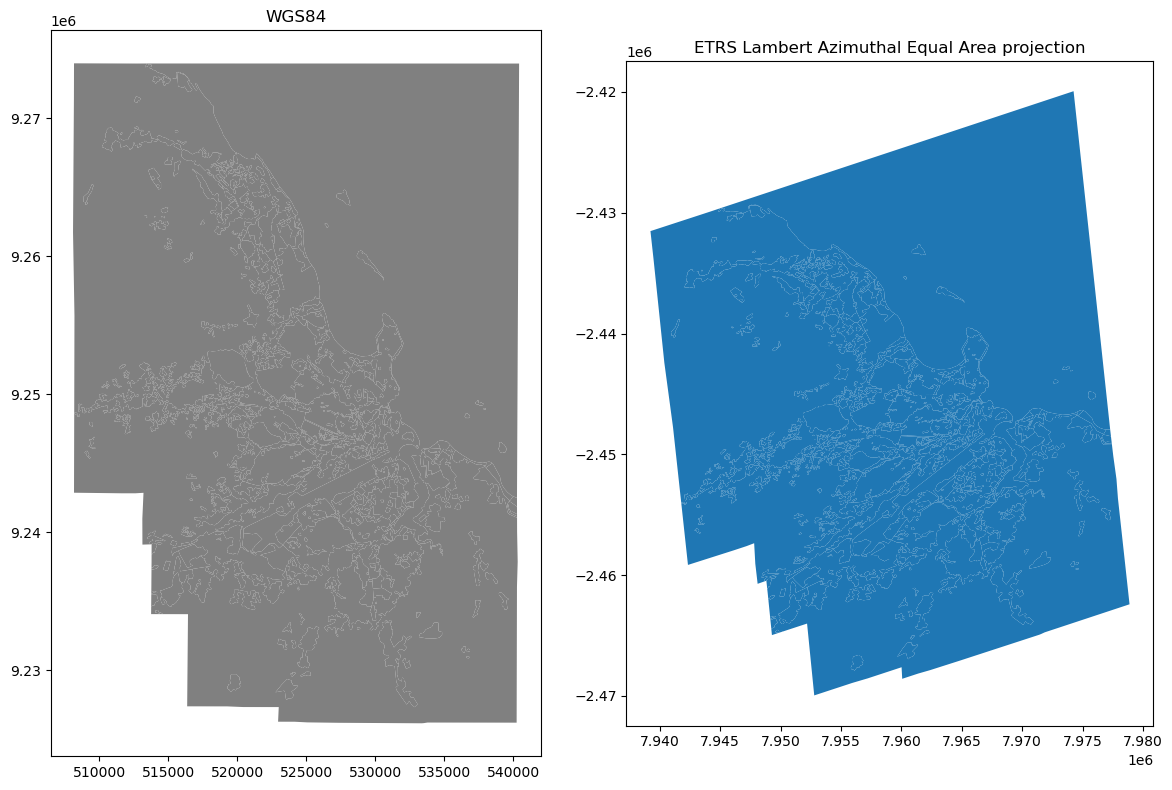

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

# Make subplots that are next to each other
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

# Plot the data in WGS84 CRS
orig.plot(ax=ax1, facecolor="gray")

# Add title
ax1.set_title("WGS84")

# Plot the one with ETRS-LAEA projection
data.plot(ax=ax2)

# Add title
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection")

# Remove empty white space around the plot
plt.tight_layout()